In [2]:
# import library 
import pickle
import tensorflow as tf
import numpy as np
import sys, os,cv2
from scipy.misc import imread,imresize
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imgaug import augmenters as iaa
import imgaug as ia
from scipy.ndimage import zoom
from sklearn.utils import shuffle
import matplotlib.animation as animation
import seaborn as sns

plt.style.use('seaborn-white')
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
np.random.seed(6278)
tf.set_random_seed(6728)
ia.seed(6278)

In [5]:
# read the data shuffle 
data = pickle.load(open('../../DataSet_Medical/histopathology/histopathology.pkl', 'rb'),encoding='latin1')
train_data = np.asarray(data['training'])
test_data  = np.asarray(data['test'])

idx = np.random.permutation(len(train_data))
train_data = train_data[idx]
idx = np.random.permutation(len(test_data))
test_data = test_data[idx]

train_data=train_data.astype(np.float64);test_data=test_data.astype(np.float64)

print('Train Data Shape: ', train_data.shape)
print('Test  Data Shape: ', test_data.shape)

Train Data Shape:  (6800, 28, 28)
Test  Data Shape:  (2000, 28, 28)


In [7]:
# train data shape
train_data_x = train_data[:,:,:,None]
print(train_data_x.shape)

(6800, 28, 28, 1)


In [9]:
temp_data = train_data_x[:100].reshape((100,-1))

def _sym_decorrelation(W):
    """ Symmetric decorrelation
    i.e. W <- (W * W.T) ^{-1/2} * W
    """
    s, u = linalg.eigh(np.dot(W, W.T))
    # u (resp. s) contains the eigenvectors (resp. square roots of
    # the eigenvalues) of W * W.T
    return np.dot(np.dot(u * (1. / np.sqrt(s)), u.T), W)

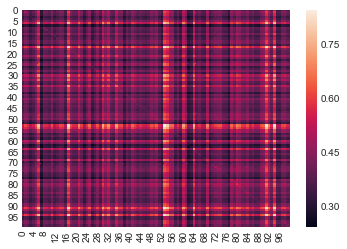

In [10]:
import seaborn as sns 
sns.heatmap(temp_data @ temp_data.T /(temp_data.shape[1]-1))

In [ ]:
ss = _sym_decorrelation(temp_data)